# 提取TensorBoard中提取数据，并绘图

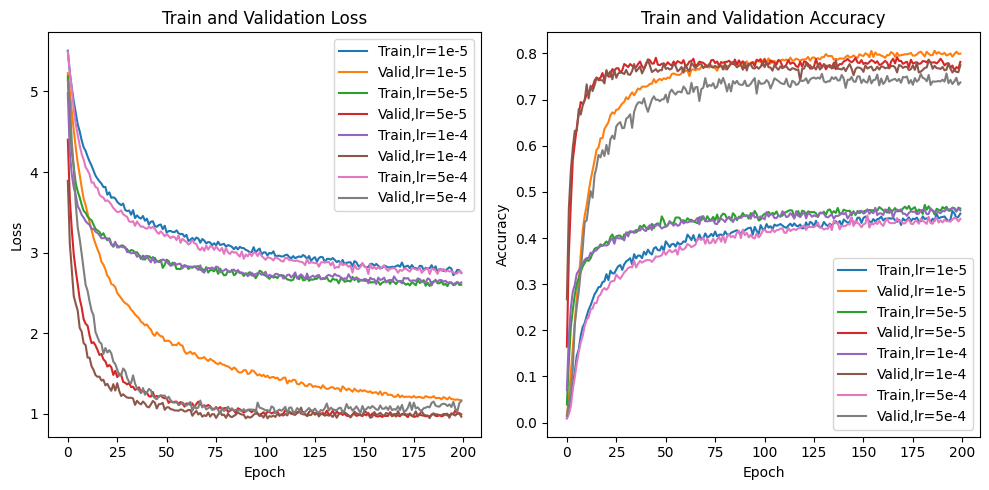

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# 定义日志文件路径
log_file_1e_5 = 'runs/resnet18_pretrained1_lr1e-05_epoch200_dropout0.5_adam_lrsch0_525576'
log_file_5e_5 = 'runs/resnet18_pretrained1_lr5e-05_epoch200_dropout0.5_adam_lrsch0_511956'
log_file_1e_4 = 'runs/resnet18_pretrained1_lr0.0001_batchsize32_epoch200_dropout0.5_adam_465038'
log_file_5e_4 = 'runs/resnet18_pretrained1_lr0.0005_epoch200_dropout0.5_adam_lrsch0_531029'

log_file_1e_5_400 = 'runs/resnet18_pretrained1_lr1e-05_epoch400_dropout0.5_adam_lrsch0_540954'
log_file_1e_4_raw = 'runs/resnet18_pretrained0_lr0.0001_batchsize32_epoch500_dropout0.5_adam_450716'
log_file_1e_3_raw_lrsch = 'runs/resnet18_pretrained0_lr0.001_epoch500_dropout0.5_adam_lrsch1_471556'
log_file_1e_4_raw_lrsch = 'runs/resnet18_pretrained0_lr0.0001_epoch500_dropout0.5_adam_lrsch1_886678'


# 初始化 EventAccumulator
event_acc_1e_5 = EventAccumulator(log_file_1e_5).Reload()
event_acc_5e_5 = EventAccumulator(log_file_5e_5).Reload()
event_acc_1e_4 = EventAccumulator(log_file_1e_4).Reload()
event_acc_5e_4 = EventAccumulator(log_file_5e_4).Reload()



# 提取 epoch, loss 和 accuracy 数据
epochs = [x.step for x in event_acc_1e_5.Scalars('Loss/test')]
train_loss_1e_5 = [x.value for x in event_acc_1e_5.Scalars('Loss/train')]
train_accuracy_1e_5 = [x.value for x in event_acc_1e_5.Scalars('Accuracy/train')]
val_loss_1e_5 = [x.value for x in event_acc_1e_5.Scalars('Loss/test')]
val_accuracy_1e_5 = [x.value for x in event_acc_1e_5.Scalars('Accuracy/test')]

train_loss_5e_5 = [x.value for x in event_acc_5e_5.Scalars('Loss/train')]
train_accuracy_5e_5 = [x.value for x in event_acc_5e_5.Scalars('Accuracy/train')]
val_loss_5e_5 = [x.value for x in event_acc_5e_5.Scalars('Loss/test')]
val_accuracy_5e_5 = [x.value for x in event_acc_5e_5.Scalars('Accuracy/test')]

train_loss_1e_4 = [x.value for x in event_acc_1e_4.Scalars('Loss/train')]
train_accuracy_1e_4 = [x.value for x in event_acc_1e_4.Scalars('Accuracy/train')]
val_loss_1e_4 = [x.value for x in event_acc_1e_4.Scalars('Loss/test')]
val_accuracy_1e_4 = [x.value for x in event_acc_1e_4.Scalars('Accuracy/test')]
# val_accuracy_1e_4

train_loss_5e_4 = [x.value for x in event_acc_5e_4.Scalars('Loss/train')]
train_accuracy_5e_4 = [x.value for x in event_acc_5e_4.Scalars('Accuracy/train')]
val_loss_5e_4 = [x.value for x in event_acc_5e_4.Scalars('Loss/test')]
val_accuracy_5e_4 = [x.value for x in event_acc_5e_4.Scalars('Accuracy/test')]

# 创建数据框以便进一步处理
df = pd.DataFrame({'epoch': epochs, 
                   'train_loss_1e_5': train_loss_1e_5, 'train_accuracy_1e_5': train_accuracy_1e_5, 'val_loss_1e_5': val_loss_1e_5, 'val_accuracy_1e_5': val_accuracy_1e_5,
                   'train_loss_5e_5': train_loss_5e_5, 'train_accuracy_5e_5': train_accuracy_5e_5, 'val_loss_5e_5': val_loss_5e_5, 'val_accuracy_5e_5': val_accuracy_5e_5,
                   'train_loss_1e_4': train_loss_1e_4, 'train_accuracy_1e_4': train_accuracy_1e_4, 'val_loss_1e_4': val_loss_1e_4, 'val_accuracy_1e_4': val_accuracy_1e_4,
                   'train_loss_5e_4': train_loss_5e_4, 'train_accuracy_5e_4': train_accuracy_5e_4, 'val_loss_5e_4': val_loss_5e_4, 'val_accuracy_5e_4': val_accuracy_5e_4})

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train_loss_1e_5'], label='Train,lr=1e-5')
plt.plot(df['epoch'], df['val_loss_1e_5'], label='Valid,lr=1e-5')
plt.plot(df['epoch'], df['train_loss_5e_5'], label='Train,lr=5e-5')
plt.plot(df['epoch'], df['val_loss_5e_5'], label='Valid,lr=5e-5')
plt.plot(df['epoch'], df['train_loss_1e_4'], label='Train,lr=1e-4')
plt.plot(df['epoch'], df['val_loss_1e_4'], label='Valid,lr=1e-4')
plt.plot(df['epoch'], df['train_loss_5e_4'], label='Train,lr=5e-4')
plt.plot(df['epoch'], df['val_loss_5e_4'], label='Valid,lr=5e-4')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['train_accuracy_1e_5'], label='Train,lr=1e-5')
plt.plot(df['epoch'], df['val_accuracy_1e_5'], label='Valid,lr=1e-5')
plt.plot(df['epoch'], df['train_accuracy_5e_5'], label='Train,lr=5e-5')
plt.plot(df['epoch'], df['val_accuracy_5e_5'], label='Valid,lr=5e-5')
plt.plot(df['epoch'], df['train_accuracy_1e_4'], label='Train,lr=1e-4')
plt.plot(df['epoch'], df['val_accuracy_1e_4'], label='Valid,lr=1e-4')
plt.plot(df['epoch'], df['train_accuracy_5e_4'], label='Train,lr=5e-4')
plt.plot(df['epoch'], df['val_accuracy_5e_4'], label='Valid,lr=5e-4')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')

plt.tight_layout()
plt.savefig('vis/loss_acc.png')
plt.show()


In [7]:
import pandas as pd

columns = ['val_accuracy_1e_5', 'val_accuracy_5e_5', 'val_accuracy_1e_4', 'val_accuracy_5e_4',
           ]

for col in columns:
    max_val_accuracy = df[col].max()
    max_index = df[col].idxmax()
    corresponding_train_accuracy = df.loc[max_index, col.replace('val', 'train')]
    print(f"Maximum {col}: {max_val_accuracy}")
    print(f"Index of maximum {col}: {max_index}")
    print(f"Corresponding {col.replace('val', 'train')}: {corresponding_train_accuracy}")
    print()


Maximum val_accuracy_1e_5: 0.8057675957679749
Index of maximum val_accuracy_1e_5: 186
Corresponding train_accuracy_1e_5: 0.43718111515045166

Maximum val_accuracy_5e_5: 0.7917726635932922
Index of maximum val_accuracy_5e_5: 167
Corresponding train_accuracy_5e_5: 0.4576955735683441

Maximum val_accuracy_1e_4: 0.7854113578796387
Index of maximum val_accuracy_1e_4: 41
Corresponding train_accuracy_1e_4: 0.4234693944454193

Maximum val_accuracy_5e_4: 0.7565733790397644
Index of maximum val_accuracy_5e_4: 192
Corresponding train_accuracy_5e_4: 0.4366496503353119



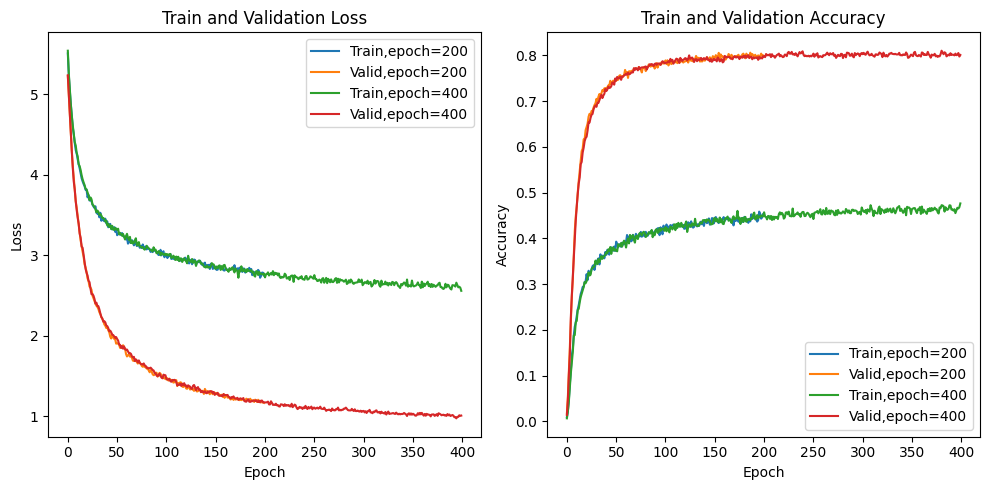

In [8]:
# 初始化 EventAccumulator
event_acc_1e_5_400 = EventAccumulator(log_file_1e_5_400).Reload()
event_acc_1e_4_raw = EventAccumulator(log_file_1e_4_raw).Reload()
event_acc_1e_3_raw_lrsch = EventAccumulator(log_file_1e_3_raw_lrsch).Reload()
event_acc_1e_4_raw_lrsch = EventAccumulator(log_file_1e_4_raw_lrsch).Reload()

# 提取 epoch, loss 和 accuracy 数据
epochs_1e_5_400 = [x.step for x in event_acc_1e_5_400.Scalars('Loss/test')]
train_loss_1e_5_400 = [x.value for x in event_acc_1e_5_400.Scalars('Loss/train')]
train_accuracy_1e_5_400 = [x.value for x in event_acc_1e_5_400.Scalars('Accuracy/train')]
val_loss_1e_5_400 = [x.value for x in event_acc_1e_5_400.Scalars('Loss/test')]
val_accuracy_1e_5_400 = [x.value for x in event_acc_1e_5_400.Scalars('Accuracy/test')]

epochs_1e_4_raw = [x.step for x in event_acc_1e_4_raw.Scalars('Loss/test')]
train_loss_1e_4_raw = [x.value for x in event_acc_1e_4_raw.Scalars('Loss/train')]
train_accuracy_1e_4_raw = [x.value for x in event_acc_1e_4_raw.Scalars('Accuracy/train')]
val_loss_1e_4_raw = [x.value for x in event_acc_1e_4_raw.Scalars('Loss/test')]
val_accuracy_1e_4_raw = [x.value for x in event_acc_1e_4_raw.Scalars('Accuracy/test')]

epochs_1e_3_raw_lrsch = [x.step for x in event_acc_1e_3_raw_lrsch.Scalars('Loss/test')]
train_loss_1e_3_raw_lrsch = [x.value for x in event_acc_1e_3_raw_lrsch.Scalars('Loss/train')]
train_accuracy_1e_3_raw_lrsch = [x.value for x in event_acc_1e_3_raw_lrsch.Scalars('Accuracy/train')]
val_loss_1e_3_raw_lrsch = [x.value for x in event_acc_1e_3_raw_lrsch.Scalars('Loss/test')]
val_accuracy_1e_3_raw_lrsch = [x.value for x in event_acc_1e_3_raw_lrsch.Scalars('Accuracy/test')]

epochs_1e_4_raw_lrsch = [x.step for x in event_acc_1e_4_raw_lrsch.Scalars('Loss/test')]
train_loss_1e_4_raw_lrsch = [x.value for x in event_acc_1e_4_raw_lrsch.Scalars('Loss/train')]
train_accuracy_1e_4_raw_lrsch = [x.value for x in event_acc_1e_4_raw_lrsch.Scalars('Accuracy/train')]
val_loss_1e_4_raw_lrsch = [x.value for x in event_acc_1e_4_raw_lrsch.Scalars('Loss/test')]
val_accuracy_1e_4_raw_lrsch = [x.value for x in event_acc_1e_4_raw_lrsch.Scalars('Accuracy/test')]


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train_loss_1e_5'], label='Train,epoch=200')
plt.plot(df['epoch'], df['val_loss_1e_5'], label='Valid,epoch=200')
plt.plot(epochs_1e_5_400, train_loss_1e_5_400, label='Train,epoch=400')
plt.plot(epochs_1e_5_400, val_loss_1e_5_400, label='Valid,epoch=400')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['train_accuracy_1e_5'], label='Train,epoch=200')
plt.plot(df['epoch'], df['val_accuracy_1e_5'], label='Valid,epoch=200')
plt.plot(epochs_1e_5_400, train_accuracy_1e_5_400, label='Train,epoch=400')
plt.plot(epochs_1e_5_400, val_accuracy_1e_5_400, label='Valid,epoch=400')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')

plt.tight_layout()
plt.savefig('vis/loss_acc_lr1e-5_epoch.png')
plt.show()
plt.close()

In [9]:
max(val_accuracy_1e_5_400), max(val_accuracy_1e_4_raw), max(val_accuracy_1e_3_raw_lrsch), max(val_accuracy_1e_4_raw_lrsch)

(0.8100084662437439, 0.6704834699630737, 0.6327396035194397, 0.656912624835968)

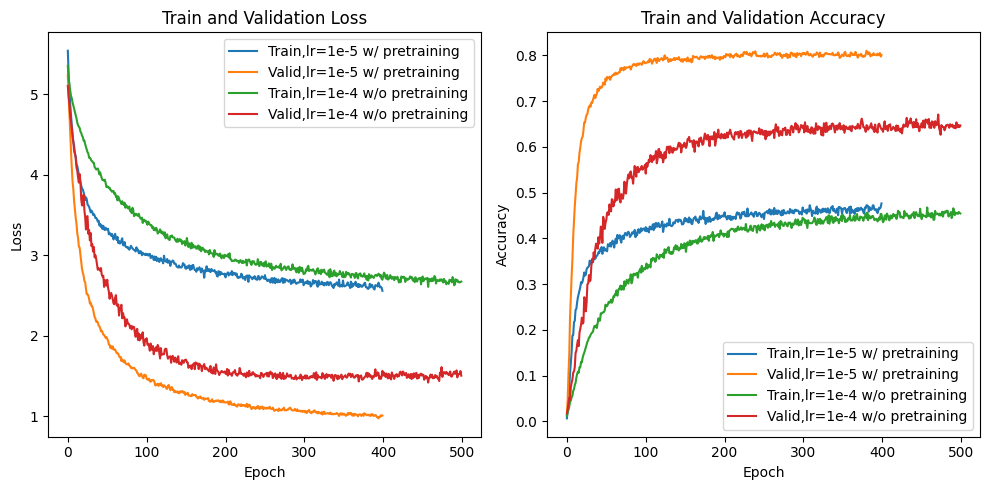

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_1e_5_400, train_loss_1e_5_400, label='Train,lr=1e-5 w/ pretraining')
plt.plot(epochs_1e_5_400, val_loss_1e_5_400, label='Valid,lr=1e-5 w/ pretraining')
plt.plot(epochs_1e_4_raw, train_loss_1e_4_raw, label='Train,lr=1e-4 w/o pretraining')
plt.plot(epochs_1e_4_raw, val_loss_1e_4_raw, label='Valid,lr=1e-4 w/o pretraining')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_1e_5_400, train_accuracy_1e_5_400, label='Train,lr=1e-5 w/ pretraining')
plt.plot(epochs_1e_5_400, val_accuracy_1e_5_400, label='Valid,lr=1e-5 w/ pretraining')
plt.plot(epochs_1e_4_raw, train_accuracy_1e_4_raw, label='Train,lr=1e-4 w/o pretraining')
plt.plot(epochs_1e_4_raw, val_accuracy_1e_4_raw, label='Valid,lr=1e-4 w/o pretraining')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')

plt.tight_layout()
plt.savefig('vis/loss_acc_pretrained.png')
plt.show()
plt.close()

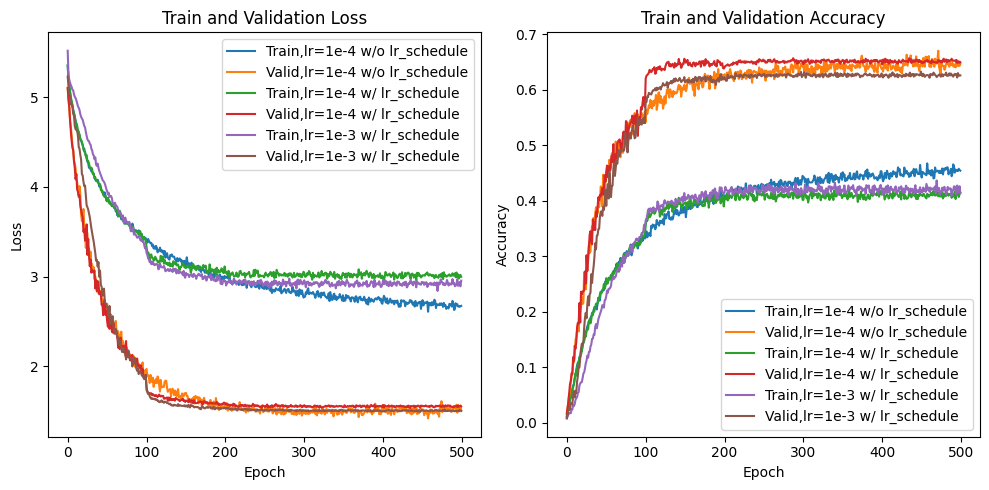

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_1e_4_raw, train_loss_1e_4_raw, label='Train,lr=1e-4 w/o lr_schedule')
plt.plot(epochs_1e_4_raw, val_loss_1e_4_raw, label='Valid,lr=1e-4 w/o lr_schedule')
plt.plot(epochs_1e_4_raw_lrsch, train_loss_1e_4_raw_lrsch, label='Train,lr=1e-4 w/ lr_schedule')
plt.plot(epochs_1e_4_raw_lrsch, val_loss_1e_4_raw_lrsch, label='Valid,lr=1e-4 w/ lr_schedule')
plt.plot(epochs_1e_3_raw_lrsch, train_loss_1e_3_raw_lrsch, label='Train,lr=1e-3 w/ lr_schedule')
plt.plot(epochs_1e_3_raw_lrsch, val_loss_1e_3_raw_lrsch, label='Valid,lr=1e-3 w/ lr_schedule')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_1e_4_raw, train_accuracy_1e_4_raw, label='Train,lr=1e-4 w/o lr_schedule')
plt.plot(epochs_1e_4_raw, val_accuracy_1e_4_raw, label='Valid,lr=1e-4 w/o lr_schedule')
plt.plot(epochs_1e_4_raw_lrsch, train_accuracy_1e_4_raw_lrsch, label='Train,lr=1e-4 w/ lr_schedule')
plt.plot(epochs_1e_4_raw_lrsch, val_accuracy_1e_4_raw_lrsch, label='Valid,lr=1e-4 w/ lr_schedule')
plt.plot(epochs_1e_3_raw_lrsch, train_accuracy_1e_3_raw_lrsch, label='Train,lr=1e-3 w/ lr_schedule')
plt.plot(epochs_1e_3_raw_lrsch, val_accuracy_1e_3_raw_lrsch, label='Valid,lr=1e-3 w/ lr_schedule')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')

plt.tight_layout()
plt.savefig('vis/loss_acc_pretrained0_lrsch.png')
plt.show()
plt.close()